<a href="https://colab.research.google.com/github/arifpras/BelutListrik/blob/main/20250617_fpl_fwd_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
setwd("/content/drive/MyDrive/00fpl")
getwd()

[1] "/content/drive/MyDrive/00fpl"

In [1]:
library(readr)
library(dplyr)

db00 <- read_csv("/content/drive/MyDrive/00fpl/db00all_fpl.csv", show_col_types = FALSE)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [10]:
glimpse(db00)

Rows: 64,661
Columns: 40
$ name                       <chr> "Femi Seriki", "Jack Hinshelwood", "Jadon S…
$ position                   <chr> "DEF", "MID", "MID", "DEF", "MID", "GK", "M…
$ team                       <chr> "Sheffield Utd", "Brighton", "Man Utd", "Sh…
$ x_p                        <dbl> 0.5, 1.5, 3.0, 0.1, 2.1, 2.4, 0.5, 4.1, 0.0…
$ assists                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bonus                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bps                        <dbl> 0, 0, 4, 0, 6, 0, 3, 0, 0, 0, 0, 0, 1, 15, …
$ clean_sheets               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ creativity                 <dbl> 0.0, 0.0, 11.3, 0.0, 11.5, 0.0, 0.0, 0.0, 0…
$ element                    <dbl> 653, 621, 397, 487, 105, 607, 655, 354, 417…
$ expected_assists           <dbl> 0.00, 0.00, 0.05, 0.00, 0.01, 0.00, 0.01, 0…
$ expected_goal_involvements <dbl> 0.00, 0.00, 0.05, 0.00, 0.03, 0.00, 0.01, 0…
$ expected_goal

In [18]:
important_vars <- c(
  "name", "total_points", "position", "team", "x_p", "assists", "bonus", "bps",
  "clean_sheets", "creativity", "expected_assists", "expected_goal_involvements",
  "expected_goals", "expected_goals_conceded", "goals_conceded", "goals_scored",
  "influence", "minutes", "own_goals", "penalties_missed",
  "penalties_saved", "red_cards", "saves", "selected", "starts", "team_a_score",
  "team_h_score", "threat", "transfers_balance", "value"
)

db01 <- db00 %>%
  select(all_of(important_vars)) %>%
  # filter(minutes != 0) %>%
  # filter(position == "FWD") %>%
  # filter(value >= 36) %>%
  filter(minutes != 0, position == "FWD", value >= 36) %>%
  mutate(value = value / 10) %>%
  relocate(total_points)

glimpse(db01)

Rows: 2,483
Columns: 30
$ total_points               <dbl> 8, 1, 1, 1, 5, 1, 2, 7, 2, 9, 1, 1, 1, 5, 2…
$ name                       <chr> "Eddie Nketiah", "Kieffer Moore", "Fábio Si…
$ position                   <chr> "FWD", "FWD", "FWD", "FWD", "FWD", "FWD", "…
$ team                       <chr> "Arsenal", "Bournemouth", "Wolves", "Sheffi…
$ x_p                        <dbl> 2.4, 1.4, 1.4, 0.5, 2.1, 2.1, 0.9, 2.4, 1.4…
$ assists                    <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bonus                      <dbl> 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0…
$ bps                        <dbl> 26, 2, 6, -5, 18, 1, 5, 26, -4, 33, 6, 3, 5…
$ clean_sheets               <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0…
$ creativity                 <dbl> 5.9, 3.3, 10.8, 0.0, 23.4, 0.0, 0.0, 0.0, 1…
$ expected_assists           <dbl> 0.01, 0.05, 0.01, 0.01, 0.10, 0.00, 0.09, 0…
$ expected_goal_involvements <dbl> 0.22, 0.09, 0.34, 0.25, 0.33, 0.12, 0.09, 1…
$ expected_goals

In [19]:
db01 %>% head()

total_points,name,position,team,x_p,assists,bonus,bps,clean_sheets,creativity,⋯,penalties_saved,red_cards,saves,selected,starts,team_a_score,team_h_score,threat,transfers_balance,value
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Eddie Nketiah,FWD,Arsenal,2.4,0,2,26,1,5.9,⋯,0,0,0,210426,1,1,2,36,0,5.5
1,Kieffer Moore,FWD,Bournemouth,1.4,0,0,2,0,3.3,⋯,0,0,0,42328,0,1,1,7,0,5.0
1,Fábio Silva,FWD,Wolves,1.4,0,0,6,0,10.8,⋯,0,0,0,22652,0,0,1,57,0,5.5
1,William Osula,FWD,Sheffield Utd,0.5,0,0,-5,0,0.0,⋯,0,0,0,135543,1,1,0,0,0,4.5
5,Ollie Watkins,FWD,Aston Villa,2.1,1,0,18,0,23.4,⋯,0,0,0,2116959,1,1,5,29,0,8.0
1,Danny Ings,FWD,West Ham,2.1,0,0,1,0,0.0,⋯,0,0,0,165077,0,1,1,7,0,6.0


In [21]:
db01 %>%
  arrange(desc(total_points)) %>%
  select(name, team, position, value, total_points)

name,team,position,value,total_points
<chr>,<chr>,<chr>,<dbl>,<dbl>
Ollie Watkins,Aston Villa,FWD,7.9,23
Erling Haaland,Man City,FWD,14.1,21
Erling Haaland,Man City,FWD,14.0,20
Jean-Philippe Mateta,Crystal Palace,FWD,5.1,20
Ollie Watkins,Aston Villa,FWD,8.8,18
Evan Ferguson,Brighton,FWD,5.9,17
Eddie Nketiah,Arsenal,FWD,5.5,17
Dominic Solanke,Bournemouth,FWD,6.8,17
Chris Wood,Nott'm Forest,FWD,4.9,17


In [7]:
# library(tidyverse)
# library(tidyr)

# db02 <- db01 %>%
#   relocate(team, position) %>%
#   pivot_longer(
#     cols = total_points:value,
#     names_to = "obsvar",
#     values_to = "obsval"
#   )

# glimpse(db02)

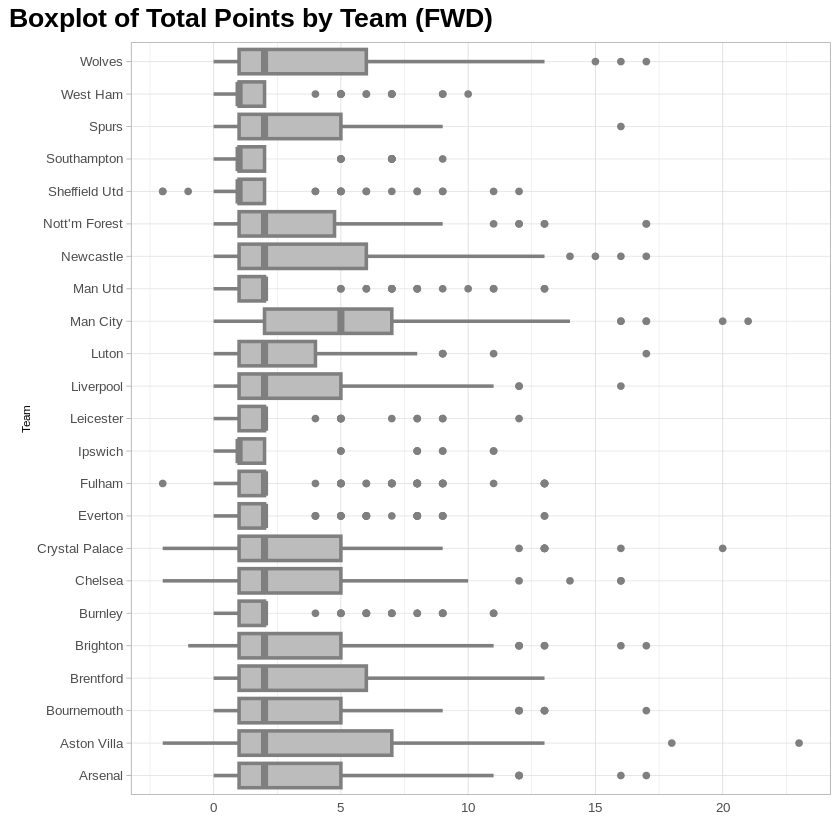

In [26]:
# install.packages("colorspace")

library(ggplot2)
library(colorspace)
library(dplyr)

# Filter and plot
db01 %>%
  select(-name) %>%
  ggplot(aes(x = team, y = total_points)) +
  geom_boxplot(
    aes(
      fill = after_scale(desaturate(lighten(color, 0.7), 0.7))
    ),
    size = 1,
    color = "grey50"
  ) +
  scale_fill_manual(values = NULL) +
  # facet_wrap(~ obsvar, scales = "free", nrow = 1) +
  theme_light() +
  labs(
    title = "Boxplot of Total Points by Team (FWD)",
    x = "\nTeam",
    y = "",
    color = NULL
  ) +
    coord_flip() +
  theme(
    axis.text.x = element_text(size = 8),
    axis.ticks.x = element_blank(),
    axis.line.x = element_blank(),
    axis.title.x = element_text(size = 7),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 7),
    axis.line.y = element_blank(),
    plot.title = element_text(hjust = 0, size = 16, face = "bold"),
    plot.title.position = "plot",
    strip.text.x = element_text(size = 8),
    panel.grid.major.y = element_line(color = "grey90"),
    panel.spacing = unit(1, "lines"),
    legend.position = "none"
  )

In [28]:
db01 %>%
  group_by(team) %>%
  summarise(
    count_players = n(),
    min_points = min(total_points, na.rm = TRUE),
    q1 = quantile(total_points, 0.25, na.rm = TRUE),
    q2_median = median(total_points, na.rm = TRUE),
    q3 = quantile(total_points, 0.75, na.rm = TRUE),
    q4 = max(total_points, na.rm = TRUE),
    max_points = max(total_points, na.rm = TRUE),
    mean_points = mean(total_points, na.rm = TRUE),
    value_weighted_avg = weighted.mean(total_points, w = value, na.rm = TRUE)
  ) %>%
  arrange(desc(q2_median))

team,count_players,min_points,q1,q2_median,q3,q4,max_points,mean_points,value_weighted_avg
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Man City,108,0,2,5,7.00,21,21,5.361111,5.686354
Arsenal,82,0,1,2,5.00,17,17,3.195122,3.276064
Aston Villa,105,-2,1,2,7.00,23,23,4.266667,4.572712
Bournemouth,147,0,1,2,5.00,17,17,3.285714,3.432641
Brentford,119,0,1,2,6.00,13,13,3.605042,3.658848
Brighton,145,-1,1,2,5.00,17,17,3.227586,3.217445
Burnley,96,0,1,2,2.00,11,11,2.635417,2.624695
Chelsea,90,-2,1,2,5.00,16,16,3.100000,3.214924
Crystal Palace,120,-2,1,2,5.00,20,20,3.433333,3.436578


In [29]:
install.packages("stargazer")
library(stargazer)

db01 %>%
  as.data.frame() %>%
  stargazer(type = 'text', out = "descsumm01_fwd.txt", digits = 1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





Statistic                    N     Mean     St. Dev.      Min        Max   
---------------------------------------------------------------------------
total_points               2,483    3.1        3.4         -2        23    
x_p                        2,483    2.8        2.5        -1.2      17.9   
assists                    2,483    0.1        0.3         0          3    
bonus                      2,483    0.4        0.9         0          3    
bps                        2,483   10.8       15.3        -10        102   
clean_sheets               2,483    0.2        0.4         0          1    
creativity                 2,483    8.6       10.8        0.0       91.0   
expected_assists           2,483   0.05        0.1        0.0        1.0   
expected_goal_involvements 2,483    0.3        0.4        0.0        2.8   
expected_goals             2,483    0.3        0.4        0.0        2.8   
expected_goals_conceded    2,483    0.9        0.8        0.0        7.8   
goals_conce

In [30]:
install.packages("parameters")

library(dplyr)
library(parameters)

# Get the summary as a data frame
descsumm02 <- db01 %>%
  select(where(is.numeric)) %>%
  describe_distribution()

descsumm02

# Save it as plain text
capture.output(print(descsumm02, digits = 1), file = "descsumm02_fwd.txt")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘datawizard’, ‘insight’




Variable,Mean,SD,IQR,Min,Max,Skewness,Kurtosis,n,n_Missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
total_points,3.130890e+00,3.352417e+00,4.00,-2.0,23.00,1.8947223,3.6712109,2483,0
x_p,2.753323e+00,2.522586e+00,3.20,-1.2,17.90,1.3671225,2.6577131,2483,0
assists,1.055175e-01,3.360878e-01,0.00,0.0,3.00,3.4024794,12.8793599,2483,0
bonus,3.749497e-01,8.931474e-01,0.00,0.0,3.00,2.1941918,3.2435958,2483,0
bps,1.083810e+01,1.527707e+01,14.00,-10.0,102.00,1.9386177,4.4062134,2483,0
clean_sheets,1.639146e-01,3.702726e-01,0.00,0.0,1.00,1.8168034,1.3018226,2483,0
creativity,8.639750e+00,1.082995e+01,12.60,0.0,91.00,1.8580425,4.8836072,2483,0
expected_assists,4.980669e-02,1.039186e-01,0.04,0.0,1.03,3.9072169,19.4038879,2483,0
expected_goal_involvements,3.073460e-01,3.894532e-01,0.44,0.0,2.83,1.9614000,4.8454698,2483,0


In [31]:
install.packages("corrr")

library(corrr)

corr01 <- db01 %>%
  select(where(is.numeric)) %>%  # Select only numeric columns
  correlate() %>%                # Compute pairwise correlations
  # shave() %>%                    # Remove upper triangle (for clean display)
  fashion()                      # Format it for pretty printing (e.g. align decimals)

corr01

capture.output(print(corr01), file = "corr01_fwd.txt")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘ggrepel’, ‘seriation’


Warning message in stats::cor(x = x, y = y, use = use, method = method):
“the standard deviation is zero”
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,total_points,x_p,assists,bonus,bps,clean_sheets,creativity,expected_assists,expected_goal_involvements,⋯,penalties_saved,red_cards,saves,selected,starts,team_a_score,team_h_score,threat,transfers_balance,value
<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,⋯,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>
total_points,,.54,.43,.87,.96,.24,.33,.23,.65,⋯,,-.08,,.26,.39,.12,.17,.63,.10,.25
x_p,.54,,.24,.42,.50,.22,.34,.22,.48,⋯,,-.02,,.48,.45,.06,.07,.50,.37,.41
assists,.43,.24,,.18,.34,.11,.34,.33,.23,⋯,,.02,,.13,.16,.10,.13,.18,.02,.13
bonus,.87,.42,.18,,.83,.16,.24,.15,.49,⋯,,-.03,,.17,.23,.05,.09,.48,.07,.15
bps,.96,.50,.34,.83,,.22,.35,.25,.60,⋯,,-.07,,.24,.31,.13,.18,.59,.09,.23
clean_sheets,.24,.22,.11,.16,.22,,.20,.13,.22,⋯,,-.03,,.17,.36,-.18,-.16,.22,.10,.17
creativity,.33,.34,.34,.24,.35,.20,,.59,.38,⋯,,-.02,,.21,.41,.05,.03,.35,.10,.19
expected_assists,.23,.22,.33,.15,.25,.13,.59,,.39,⋯,,-.01,,.16,.24,.04,.06,.21,.06,.15
expected_goal_involvements,.65,.48,.23,.49,.60,.22,.38,.39,,⋯,,-.04,,.36,.41,.09,.10,.80,.14,.34


In [32]:
db01 %>%
  select(where(is.numeric)) %>%
  correlate() %>%
  as.data.frame() %>%
  write.csv("corr01_fwd.csv", row.names = FALSE)

Warning message in stats::cor(x = x, y = y, use = use, method = method):
“the standard deviation is zero”
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: viridisLite

Warning message in stats::cor(x = x, y = y, use = use, method = method):
“the standard deviation is zero”
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


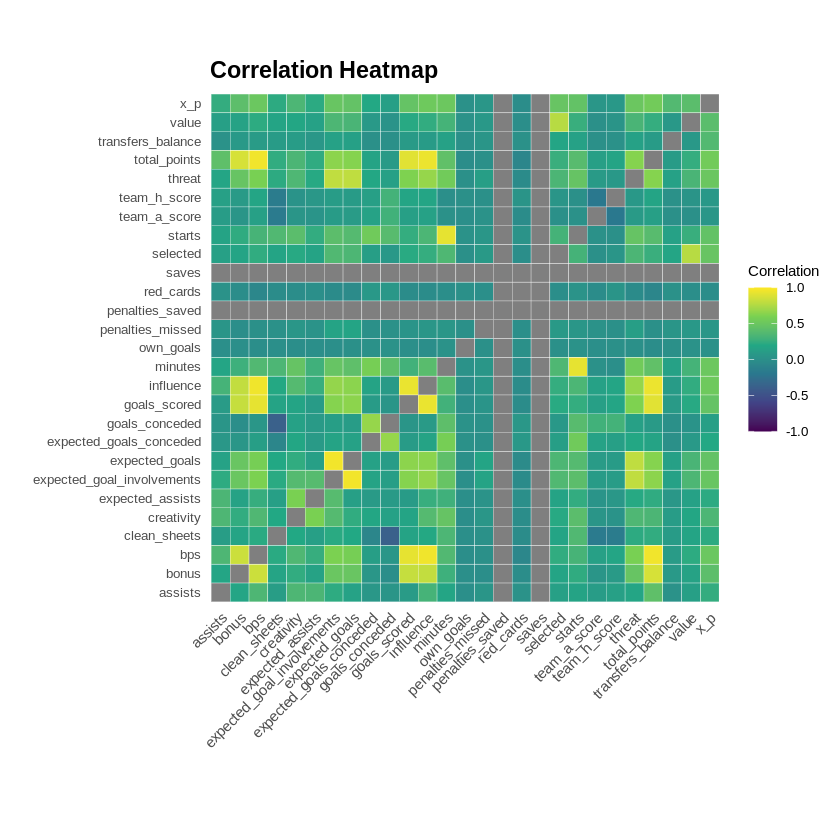

In [33]:
install.packages("viridis")

library(corrr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(viridis)

# Step 1: Compute correlations
corr_matrix <- db01 %>%
  select(where(is.numeric)) %>%
  correlate()

# Step 2: Reshape to long format
corr_long <- corr_matrix %>%
  pivot_longer(-term, names_to = "variable", values_to = "correlation")

# Step 3: Create heatmap plot object
corr_plot <- ggplot(corr_long, aes(x = term, y = variable, fill = correlation)) +
  geom_tile(color = "white") +
  scale_fill_viridis_c(option = "D", limits = c(-1, 1), name = "Correlation") +
  coord_fixed() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
    axis.text.y = element_text(size = 8),
    panel.grid = element_blank(),
    plot.title = element_text(size = 14, face = "bold", hjust = 0),
    legend.title = element_text(size = 9),
    legend.text = element_text(size = 8)
  ) +
  labs(title = "Correlation Heatmap", x = "", y = "")

corr_plot

# Step 4: Save to PDF
ggsave("heatmap01_fwd.pdf", plot = corr_plot, width = 11.7, height = 8.3)

In [34]:
# library(tidyverse)
library(tidyr)

db02 <- db01 %>%
  select(-name) %>%
  relocate(team, position) %>%
  pivot_longer(
    cols = total_points:value,
    names_to = "obsvar",
    values_to = "obsval"
  )

glimpse(db02)

Rows: 67,041
Columns: 4
$ team     <chr> "Arsenal", "Arsenal", "Arsenal", "Arsenal", "Arsenal", "Arsen…
$ position <chr> "FWD", "FWD", "FWD", "FWD", "FWD", "FWD", "FWD", "FWD", "FWD"…
$ obsvar   <chr> "total_points", "x_p", "assists", "bonus", "bps", "clean_shee…
$ obsval   <dbl> 8.00, 2.40, 0.00, 2.00, 26.00, 1.00, 5.90, 0.01, 0.22, 0.21, …


In [ ]:
# Note: No need because teh data isn't time series.

# install.packages("tseries")

# library(dplyr)
# library(tseries)

# unrt01 <- db02 %>%
#   group_by(obsvar) %>%
#   summarise(
#     box.pvalue = Box.test(obsval, lag = 1, type = "Ljung-Box")$p.value,
#     box = box.pvalue < 0.05,

#     adf.pvalue = suppressWarnings(adf.test(obsval, alternative = "stationary")$p.value),
#     adf = adf.pvalue < 0.05,

#     kpss.pvalue = suppressWarnings(kpss.test(obsval)$p.value),
#     kpss = kpss.pvalue > 0.05
#   )

# unrt01

In [ ]:
# 1. ADF test must confirm stationarity
# 2. KPSS test must confirm stationarity
# 3. Box test can be TRUE or FALSE — lenient on this

# unrt01 %>%
#   filter(box == FALSE, adf == TRUE, kpss == TRUE) %>%
#   pull(obsvar)

In [63]:
# important_vars <- c(
#     "total_points", "team", "x_p", "assists", "bonus", "bps", "clean_sheets", "creativity",
#          "expected_assists", "expected_goal_involvements", "expected_goals",
#          "expected_goals_conceded", "goals_conceded", "goals_scored", "influence",
#          "minutes", "own_goals", "penalties_missed", "penalties_saved", "red_cards",
#          "saves", "selected", "starts", "team_a_score", "team_h_score", "threat",
#          "transfers_balance", "value")

important_vars <- c(
    "total_points", "team", "assists", "creativity",
    "expected_assists", "expected_goals", "goals_scored", "influence",
    "minutes", "own_goals", "penalties_missed", "selected", "starts",
    "threat", "transfers_balance", "value")

db03 <- db01 %>%
  select(all_of(important_vars)) %>%
  relocate(total_points)

glimpse(db03)

Rows: 2,483
Columns: 16
$ total_points      <dbl> 8, 1, 1, 1, 5, 1, 2, 7, 2, 9, 1, 1, 1, 5, 2, 1, 7, 5…
$ team              <chr> "Arsenal", "Bournemouth", "Wolves", "Sheffield Utd",…
$ assists           <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ creativity        <dbl> 5.9, 3.3, 10.8, 0.0, 23.4, 0.0, 0.0, 0.0, 11.7, 21.3…
$ expected_assists  <dbl> 0.01, 0.05, 0.01, 0.01, 0.10, 0.00, 0.09, 0.03, 0.00…
$ expected_goals    <dbl> 0.21, 0.04, 0.33, 0.24, 0.23, 0.12, 0.00, 1.30, 1.35…
$ goals_scored      <dbl> 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1…
$ influence         <dbl> 30.2, 0.0, 11.2, 0.0, 32.2, 3.0, 0.0, 0.0, 9.4, 49.8…
$ minutes           <dbl> 72, 23, 13, 90, 90, 12, 63, 87, 71, 71, 32, 14, 77, …
$ own_goals         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ penalties_missed  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ selected          <dbl> 210426, 42328, 22652, 135543, 2116959, 165077, 96850…
$ starts        

In [92]:
db03$team <- factor(db03$team)

db03$team <- relevel(db03$team, ref = "Man City")

ols_fwd_base <- lm(total_points ~ ., data = db03)
# ols_fwd_robust <- lm_robust(
#   total_points ~ ., data = db03, se_type = "stata"
# )

summary(ols_fwd_base)
# summary(ols_fwd_robust)


Call:
lm(formula = total_points ~ ., data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3297 -0.1672  0.1088  0.2672  2.8072 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         7.916e-01  1.463e-01   5.411 6.87e-08 ***
teamArsenal         1.750e-02  1.102e-01   0.159 0.873805    
teamAston Villa     2.467e-02  9.846e-02   0.251 0.802183    
teamBournemouth     2.653e-02  1.059e-01   0.251 0.802214    
teamBrentford      -8.580e-02  1.064e-01  -0.807 0.419905    
teamBrighton       -7.613e-03  1.047e-01  -0.073 0.942032    
teamBurnley         3.067e-02  1.172e-01   0.262 0.793623    
teamChelsea        -1.574e-01  1.080e-01  -1.458 0.145070    
teamCrystal Palace  2.430e-02  1.075e-01   0.226 0.821127    
teamEverton         1.094e-01  1.060e-01   1.032 0.302210    
teamFulham          1.356e-01  1.099e-01   1.234 0.217346    
teamIpswich         6.825e-02  1.253e-01   0.545 0.586040    
teamLeicester       1.553e-01  1.3

Best lambda: 0.007464812 


37 x 1 sparse Matrix of class "dgCMatrix"
                              s0
(Intercept)         7.402945e-01
teamArsenal         .           
teamAston Villa     .           
teamBournemouth     .           
teamBrentford      -6.672528e-02
teamBrighton        .           
teamBurnley         .           
teamChelsea        -1.492656e-01
teamCrystal Palace  .           
teamEverton         5.381145e-02
teamFulham          8.789135e-02
teamIpswich         4.259313e-04
teamLeicester       8.748347e-02
teamLiverpool      -5.014747e-02
teamLuton           .           
teamMan Utd         3.280912e-02
teamNewcastle       .           
teamNott'm Forest   1.248469e-01
teamSheffield Utd  -5.667385e-02
teamSouthampton     .           
teamSpurs          -1.903492e-02
teamWest Ham        .           
teamWolves          .           
assists             3.120041e+00
creativity          2.989771e-03
expected_assists   -4.037591e-03
expected_goals     -7.689363e-02
goals_scored        4.986753e+00
i

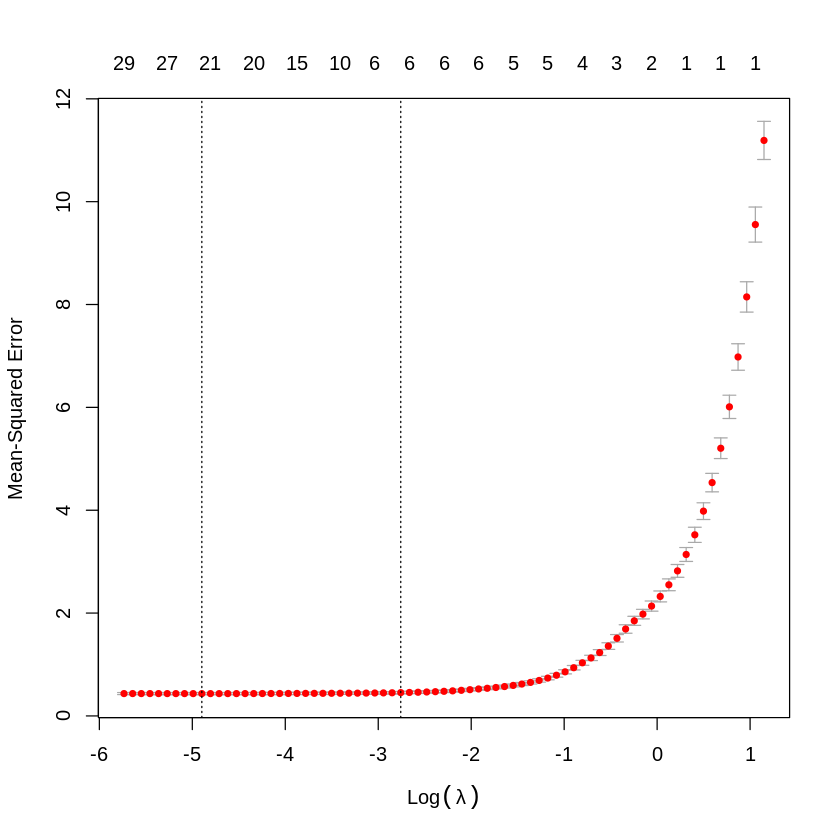

In [65]:
# 📦 Load required libraries
# install.packages("glmnet")  # run once
library(glmnet)
library(dplyr)

# 🧹 Prepare data
# Filter for FWDs only, remove missing
# db_lasso <- db01 %>%
#   select(total_points, team, x_p, assists, bonus, bps, clean_sheets, creativity,
#          expected_assists, expected_goal_involvements, expected_goals,
#          expected_goals_conceded, goals_conceded, goals_scored, influence,
#          minutes, own_goals, penalties_missed, penalties_saved, red_cards,
#          saves, selected, starts, team_a_score, team_h_score, threat,
#          transfers_balance, value) %>%
#   na.omit()

# db_lasso <- db01 %>%
#   select(total_points, team, x_p, assists, bonus, bps, clean_sheets, creativity,
#          expected_assists, expected_goals, goals_scored, influence,
#          minutes, own_goals, penalties_missed, selected, starts, threat,
#          transfers_balance, value) %>%
#   na.omit()

# 🔄 Convert categorical variable 'team' to dummy variables
x <- model.matrix(total_points ~ ., data = db03)[, -1]  # remove intercept
y <- db_lasso$total_points

# ⚙️ Fit LASSO using cross-validation
set.seed(123)
cv_fit <- cv.glmnet(x, y, alpha = 1, standardize = TRUE)

# 🔍 Optimal lambda
best_lambda <- cv_fit$lambda.min
cat("Best lambda:", best_lambda, "\n")

# 📉 Plot cross-validation error
plot(cv_fit)

# 🧾 Extract coefficients from best lambda
coef(cv_fit, s = "lambda.min")

# ✅ Predict if needed
pred <- predict(cv_fit, newx = x, s = "lambda.min")

In [66]:
# Assuming `lasso_coef` is your sparse matrix from coef(cv_fit, s = "lambda.min")
lasso_coef <- coef(cv_fit, s = "lambda.min")

# Convert to a tidy data frame
coef_df <- as.matrix(lasso_coef) %>%
  as.data.frame() %>%
  tibble::rownames_to_column(var = "feature") %>%
  rename(coefficient = s0)

# Optional: filter only non-zero coefficients
coef_df_nonzero <- coef_df %>%
  filter(coefficient != 0)

# View
print(coef_df_nonzero)

             feature   coefficient
1        (Intercept)  7.402945e-01
2      teamBrentford -6.672528e-02
3        teamChelsea -1.492656e-01
4        teamEverton  5.381145e-02
5         teamFulham  8.789135e-02
6        teamIpswich  4.259313e-04
7      teamLeicester  8.748347e-02
8      teamLiverpool -5.014747e-02
9        teamMan Utd  3.280912e-02
10 teamNott'm Forest  1.248469e-01
11 teamSheffield Utd -5.667385e-02
12         teamSpurs -1.903492e-02
13           assists  3.120041e+00
14        creativity  2.989771e-03
15  expected_assists -4.037591e-03
16    expected_goals -7.689363e-02
17      goals_scored  4.986753e+00
18         influence  1.331913e-02
19           minutes  9.870137e-03
20         own_goals -1.410073e+00
21  penalties_missed -2.516270e+00
22            starts  2.735488e-01
23            threat -1.855846e-03
24 transfers_balance  1.877231e-09
25             value -6.030336e-03


In [93]:
# install.packages("estimatr")
library(estimatr)

# install.packages("modelsummary")
# library(modelsummary)

# ols_fwd_lasso <- lm_robust(
#     total_points ~ team + assists + creativity + expected_assists + expected_goals +
#       goals_scored + influence + minutes + own_goals + penalties_missed + starts +
#       threat + transfers_balance + value, data = db03, se_type = "stata")

ols_fwd_lasso <- lm(
    total_points ~ team + assists + creativity + expected_assists + expected_goals +
      goals_scored + influence + minutes + own_goals + penalties_missed + starts +
      threat + transfers_balance + value, data = db03)

summary(ols_fwd_lasso)

# modelsummary(ols_fwd_lasso, stars = TRUE)


Call:
lm(formula = total_points ~ team + assists + creativity + expected_assists + 
    expected_goals + goals_scored + influence + minutes + own_goals + 
    penalties_missed + starts + threat + transfers_balance + 
    value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3343 -0.1721  0.1086  0.2679  2.7945 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         7.525e-01  1.430e-01   5.262 1.55e-07 ***
teamArsenal        -1.706e-02  1.068e-01  -0.160 0.873036    
teamAston Villa     1.804e-02  9.834e-02   0.183 0.854486    
teamBournemouth     9.025e-03  1.050e-01   0.086 0.931526    
teamBrentford      -1.084e-01  1.049e-01  -1.034 0.301279    
teamBrighton       -2.182e-02  1.041e-01  -0.210 0.834019    
teamBurnley         5.453e-03  1.156e-01   0.047 0.962367    
teamChelsea        -1.853e-01  1.057e-01  -1.753 0.079669 .  
teamCrystal Palace -3.299e-03  1.052e-01  -0.031 0.974994    
teamEverton         8.344e-02

In [94]:
# ols_fwdsw <- step(ols_fwd_base, direction = "both")
ols_fwdsw <- step(ols_fwd_base, direction = "both")

summary(ols_fwdsw)

Start:  AIC=-2078.84
total_points ~ team + assists + creativity + expected_assists + 
    expected_goals + goals_scored + influence + minutes + own_goals + 
    penalties_missed + selected + starts + threat + transfers_balance + 
    value

                    Df Sum of Sq    RSS      AIC
- team              22     13.20 1056.5 -2091.63
- transfers_balance  1      0.07 1043.4 -2080.68
- expected_assists   1      0.52 1043.9 -2079.60
- selected           1      0.68 1044.0 -2079.21
<none>                           1043.3 -2078.84
- value              1      0.89 1044.2 -2078.72
- expected_goals     1      1.45 1044.8 -2077.40
- threat             1      2.17 1045.5 -2075.68
- own_goals          1      2.99 1046.3 -2073.74
- creativity         1      3.00 1046.3 -2073.71
- influence          1      6.16 1049.5 -2066.22
- starts             1      6.23 1049.6 -2066.07
- minutes            1     36.61 1080.0 -1995.21
- penalties_missed   1     58.10 1101.5 -1946.27
- goals_scored       1  


Call:
lm(formula = total_points ~ assists + creativity + expected_goals + 
    goals_scored + influence + minutes + own_goals + penalties_missed + 
    selected + starts + threat + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.1523  0.1149  0.2547  2.7947 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.727e-01  6.956e-02  12.546  < 2e-16 ***
assists           3.157e+00  5.209e-02  60.598  < 2e-16 ***
creativity        3.649e-03  1.638e-03   2.227 0.026021 *  
expected_goals   -1.270e-01  6.652e-02  -1.909 0.056315 .  
goals_scored      5.108e+00  1.068e-01  47.838  < 2e-16 ***
influence         1.121e-02  3.107e-03   3.607 0.000316 ***
minutes           1.015e-02  1.111e-03   9.137  < 2e-16 ***
own_goals        -1.779e+00  6.552e-01  -2.716 0.006659 ** 
penalties_missed -2.576e+00  2.229e-01 -11.558  < 2e-16 ***
selected          2.593e-08  1.510e-08   1.717 0.086098 .  
starts            2.831e-01  

In [96]:
# install.packages("estimatr")
library(estimatr)

# install.packages("modelsummary")
# library(modelsummary)

# ols_fwd_stepwise <- lm_robust(
#     total_points ~ assists + creativity + expected_goals + goals_scored +
#       influence + minutes + own_goals + penalties_missed + selected +
#       starts + threat + transfers_balance + value, data = db03, se_type = "stata")

ols_fwd_stepwise <- lm(
    total_points ~ assists + creativity + expected_goals + goals_scored +
      influence + minutes + own_goals + penalties_missed + selected +
      starts + threat + value, data = db03)

summary(ols_fwd_stepwise)

# modelsummary(ols_fwd_stepwise, stars = TRUE)


Call:
lm(formula = total_points ~ assists + creativity + expected_goals + 
    goals_scored + influence + minutes + own_goals + penalties_missed + 
    selected + starts + threat + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.1523  0.1149  0.2547  2.7947 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.727e-01  6.956e-02  12.546  < 2e-16 ***
assists           3.157e+00  5.209e-02  60.598  < 2e-16 ***
creativity        3.649e-03  1.638e-03   2.227 0.026021 *  
expected_goals   -1.270e-01  6.652e-02  -1.909 0.056315 .  
goals_scored      5.108e+00  1.068e-01  47.838  < 2e-16 ***
influence         1.121e-02  3.107e-03   3.607 0.000316 ***
minutes           1.015e-02  1.111e-03   9.137  < 2e-16 ***
own_goals        -1.779e+00  6.552e-01  -2.716 0.006659 ** 
penalties_missed -2.576e+00  2.229e-01 -11.558  < 2e-16 ***
selected          2.593e-08  1.510e-08   1.717 0.086098 .  
starts            2.831e-01  

In [97]:
# install.packages("MuMIn")
library(MuMIn)

options(na.action = "na.fail")
ols_mumin <- get.models(dredge(ols_fwd_base, rank = "AICc"), 1)[[1]]
summary(ols_mumin)

Fixed term is "(Intercept)"




Call:
lm(formula = total_points ~ assists + creativity + expected_goals + 
    goals_scored + influence + minutes + own_goals + penalties_missed + 
    selected + starts + threat + value + 1, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.1523  0.1149  0.2547  2.7947 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.727e-01  6.956e-02  12.546  < 2e-16 ***
assists           3.157e+00  5.209e-02  60.598  < 2e-16 ***
creativity        3.649e-03  1.638e-03   2.227 0.026021 *  
expected_goals   -1.270e-01  6.652e-02  -1.909 0.056315 .  
goals_scored      5.108e+00  1.068e-01  47.838  < 2e-16 ***
influence         1.121e-02  3.107e-03   3.607 0.000316 ***
minutes           1.015e-02  1.111e-03   9.137  < 2e-16 ***
own_goals        -1.779e+00  6.552e-01  -2.716 0.006659 ** 
penalties_missed -2.576e+00  2.229e-01 -11.558  < 2e-16 ***
selected          2.593e-08  1.510e-08   1.717 0.086098 .  
starts            2.831e-

In [98]:
# install.packages("estimatr")
library(estimatr)

# install.packages("modelsummary")
# library(modelsummary)

# ols_fwd_dredge <- lm_robust(
#     total_points ~ assists + creativity + expected_goals + goals_scored +
#       influence + minutes + own_goals + penalties_missed + selected +
#       starts + threat + value, data = db03, se_type = "stata")

ols_fwd_dredge <- lm(
    total_points ~ assists + creativity + expected_goals + goals_scored +
      influence + minutes + own_goals + penalties_missed + selected +
      starts + threat + value, data = db03)

summary(ols_fwd_dredge)

# modelsummary(ols_fwd_dredge, stars = TRUE)


Call:
lm(formula = total_points ~ assists + creativity + expected_goals + 
    goals_scored + influence + minutes + own_goals + penalties_missed + 
    selected + starts + threat + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.1523  0.1149  0.2547  2.7947 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.727e-01  6.956e-02  12.546  < 2e-16 ***
assists           3.157e+00  5.209e-02  60.598  < 2e-16 ***
creativity        3.649e-03  1.638e-03   2.227 0.026021 *  
expected_goals   -1.270e-01  6.652e-02  -1.909 0.056315 .  
goals_scored      5.108e+00  1.068e-01  47.838  < 2e-16 ***
influence         1.121e-02  3.107e-03   3.607 0.000316 ***
minutes           1.015e-02  1.111e-03   9.137  < 2e-16 ***
own_goals        -1.779e+00  6.552e-01  -2.716 0.006659 ** 
penalties_missed -2.576e+00  2.229e-01 -11.558  < 2e-16 ***
selected          2.593e-08  1.510e-08   1.717 0.086098 .  
starts            2.831e-01  

In [100]:
# install.packages("olsrr")
library(olsrr)

ols_step_both_p(ols_fwd_base)



                                     Stepwise Summary                                      
-----------------------------------------------------------------------------------------
Step    Variable                   AIC          SBC         SBIC         R2       Adj. R2 
-----------------------------------------------------------------------------------------
 0      Base Model              13056.728    13068.362     6006.504    0.00000    0.00000 
 1      influence (+)            7640.466     7657.917      590.483    0.88720    0.88716 
 2      assists (+)              7122.049     7145.318       71.406    0.90853    0.90846 
 3      goals_scored (+)         5843.800     5872.886    -1205.273    0.94538    0.94531 
 4      minutes (+)              5151.563     5186.466    -1895.705    0.95870    0.95864 
 5      penalties_missed (+)     5003.482     5044.203    -2043.247    0.96112    0.96105 
 6      threat (+)               4982.825     5029.363    -2063.825    0.96148    0.96138

In [101]:
# install.packages("estimatr")
library(estimatr)

# install.packages("modelsummary")
# library(modelsummary)

# ols_fwd_olsrr <- lm_robust(
#     total_points ~ influence + assists + goals_scored + minutes + penalties_missed +
#       threat + starts + own_goals + creativity + value +
#       expected_goals + selected, data = db03, se_type = "stata")

ols_fwd_olsrr <- lm(
    total_points ~ influence + assists + goals_scored + minutes + penalties_missed +
      threat + starts + own_goals + creativity + value +
      expected_goals + selected, data = db03)

summary(ols_fwd_olsrr)

# modelsummary(ols_fwd_olsrr, stars = TRUE)


Call:
lm(formula = total_points ~ influence + assists + goals_scored + 
    minutes + penalties_missed + threat + starts + own_goals + 
    creativity + value + expected_goals + selected, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.1523  0.1149  0.2547  2.7947 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.727e-01  6.956e-02  12.546  < 2e-16 ***
influence         1.121e-02  3.107e-03   3.607 0.000316 ***
assists           3.157e+00  5.209e-02  60.598  < 2e-16 ***
goals_scored      5.108e+00  1.068e-01  47.838  < 2e-16 ***
minutes           1.015e-02  1.111e-03   9.137  < 2e-16 ***
penalties_missed -2.576e+00  2.229e-01 -11.558  < 2e-16 ***
threat           -2.681e-03  1.200e-03  -2.235 0.025510 *  
starts            2.831e-01  6.961e-02   4.067 4.92e-05 ***
own_goals        -1.779e+00  6.552e-01  -2.716 0.006659 ** 
creativity        3.649e-03  1.638e-03   2.227 0.026021 *  
value            -3.084e-02  

In [ ]:
# sink("multi_ols_summary.txt")

# summary(ols_fwd_robust)
# summary(ols_fwd_stepwise)
# summary(ols_fwd_lasso)
# summary(ols_fwd_dredge)
# summary(ols_fwd_olsrr)

# sink()

In [85]:
# install.packages("modelsummary")
# library(modelsummary)

# Create a list of models
# models <- list(
#   "Baseline" = ols_fwd,
#   "Stepwise Selection" = ols_fwd_stepwise,
#   "LASSO Selection" = ols_fwd_lasso,
#   "AICc Selection" = ols_fwd_dredge,
#   "OLSRR Selection" = ols_fwd_olsrr
# )

# Export model summary with stars to .txt
# modelsummary(
#   models,
#   output = "/content/drive/MyDrive/00fpl/multi_ols_modelsummary.txt",
#   statistic = c("std.error", "p.value"),  # Display both SE and p-value
#   stars = TRUE,                          # Add significance stars automatically
#   title = "Multiple OLS Models on FPL Points"
# )

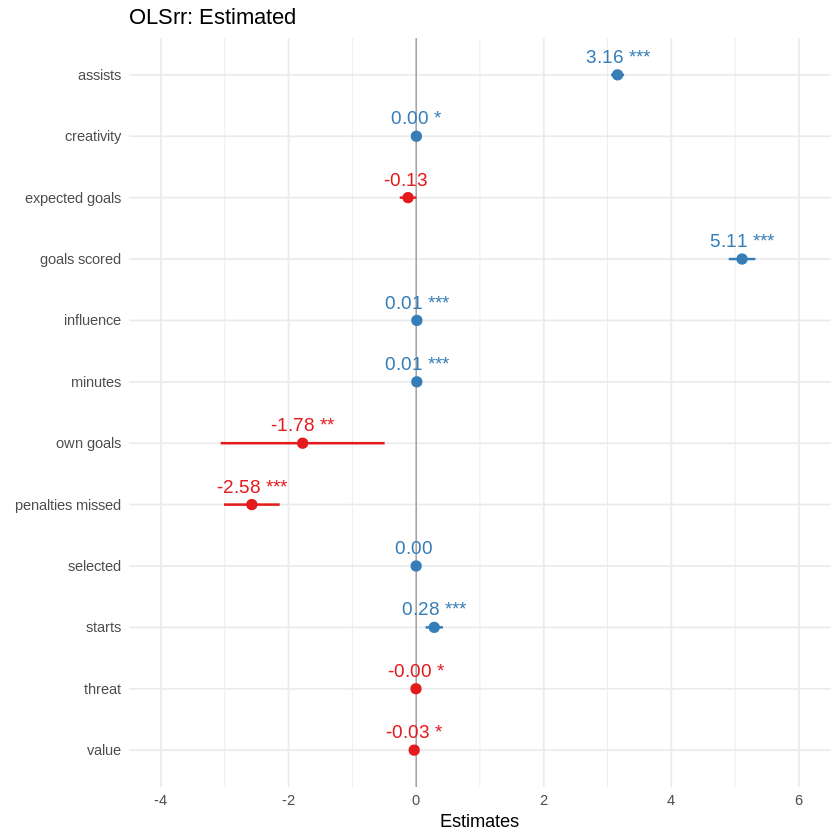

In [102]:
# install.packages("gridExtra")
library(gridExtra)

# install.packages("sjPlot")
library(sjPlot)

p1 <- plot_model(ols_fwd_dredge,
                 type = "est",
                 show.values = TRUE,
                 value.offset = 0.3,
                 title = "OLSrr: Estimated",
                 vline.color = "gray50") +
  theme_minimal()

# p2 <- plot_model(ols_fwd_dredge,
#                  type = "std",
#                  show.values = TRUE,
#                  value.offset = 0.3,
#                  title = "OLSrr: Standardized",
#                  vline.color = "gray50") +
#   theme_minimal()

grid.arrange(p1, ncol = 1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



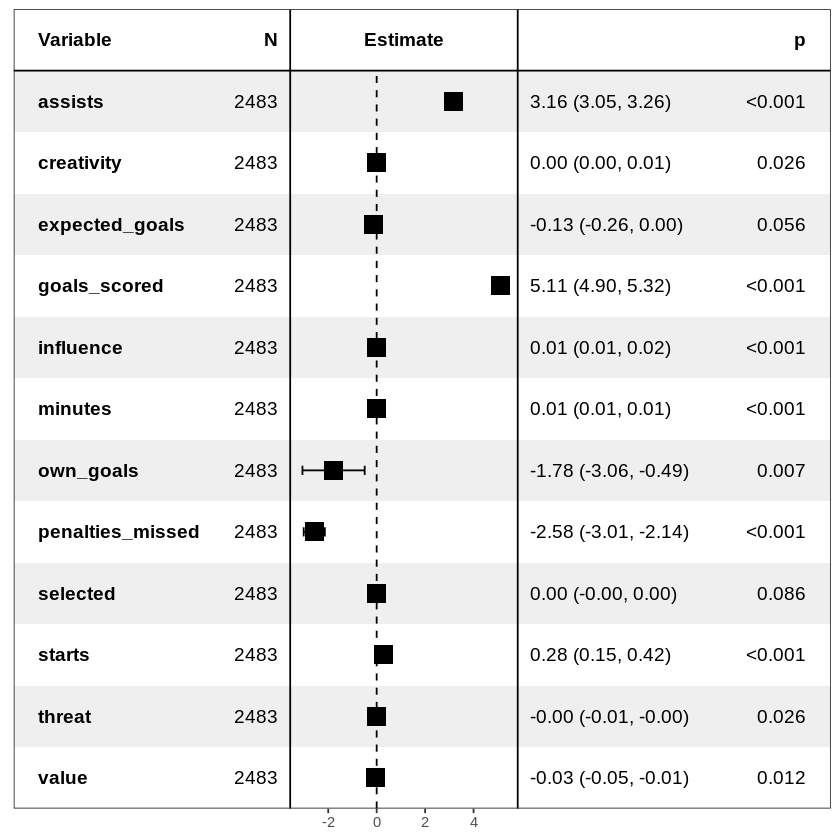

In [103]:
install.packages("forestmodel")

library(forestmodel)

forest_model(ols_fwd_dredge, theme = theme_forest(), format_options = forest_model_format_options(text_size = 4))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



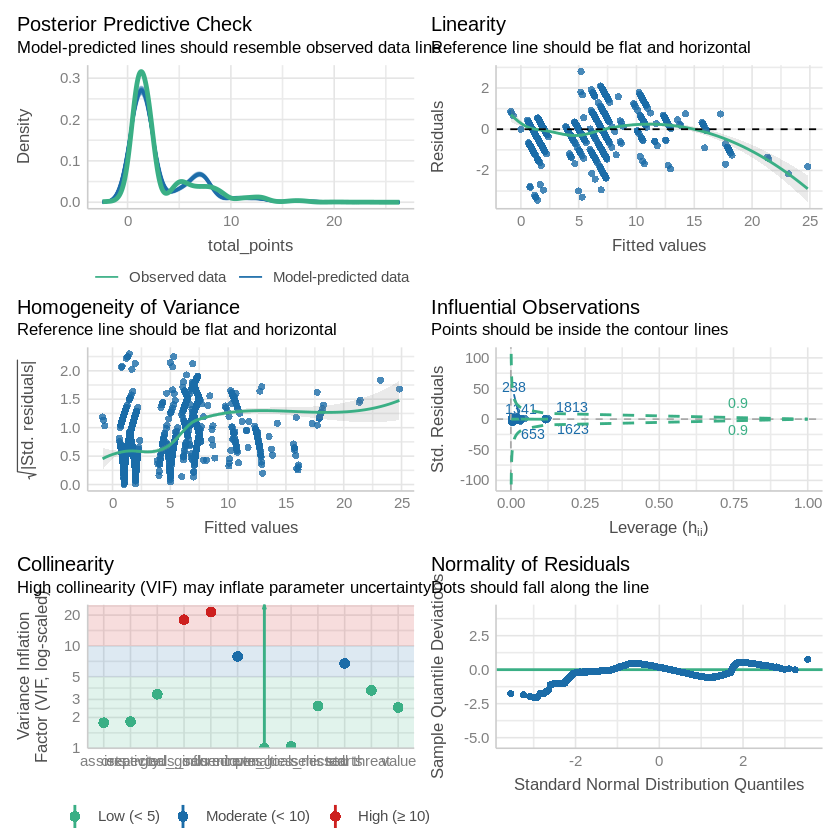

In [104]:
install.packages("see")

library(performance)
library(see)

check_model(ols_fwd_dredge)


📊 Model Summary:

Call:
lm(formula = total_points ~ assists + creativity + expected_goals + 
    goals_scored + influence + minutes + own_goals + penalties_missed + 
    selected + starts + threat + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.1523  0.1149  0.2547  2.7947 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.727e-01  6.956e-02  12.546  < 2e-16 ***
assists           3.157e+00  5.209e-02  60.598  < 2e-16 ***
creativity        3.649e-03  1.638e-03   2.227 0.026021 *  
expected_goals   -1.270e-01  6.652e-02  -1.909 0.056315 .  
goals_scored      5.108e+00  1.068e-01  47.838  < 2e-16 ***
influence         1.121e-02  3.107e-03   3.607 0.000316 ***
minutes           1.015e-02  1.111e-03   9.137  < 2e-16 ***
own_goals        -1.779e+00  6.552e-01  -2.716 0.006659 ** 
penalties_missed -2.576e+00  2.229e-01 -11.558  < 2e-16 ***
selected          2.593e-08  1.510e-08   1.717 0.086098 .  
starts     

Warning message:
“not plotting observations with leverage one:
  1917”


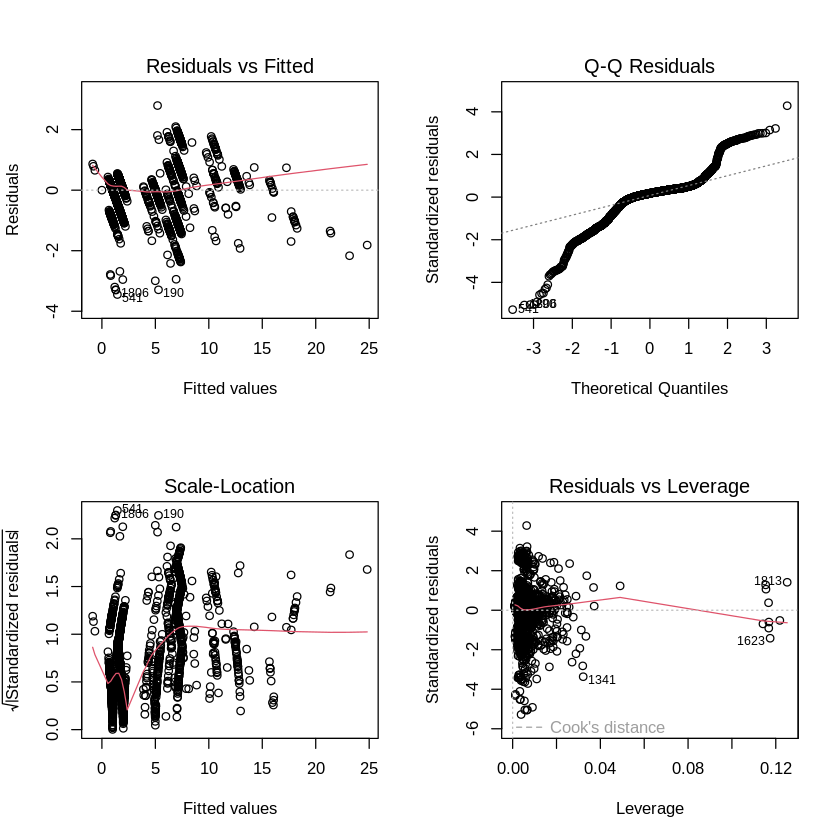

In [107]:
# Required packages
# install.packages("car")
# install.packages("lmtest")

library(car)
library(lmtest)

# ---- 1. Model Summary ----
cat("\n📊 Model Summary:\n")
print(summary(ols_fwd_dredge))

# ---- 2. Multicollinearity Check ----
cat("\n🔁 Variance Inflation Factor (VIF):\n")
print(vif(ols_fwd_dredge))

# ---- 3. Heteroskedasticity Test (Breusch–Pagan) ----
cat("\n📈 Breusch–Pagan Test for Heteroskedasticity:\n")
print(bptest(ols_fwd_dredge))

# ---- 4. Autocorrelation Check (Durbin-Watson) ----
cat("\n🔄 Durbin–Watson Test for Autocorrelation:\n")
print(dwtest(ols_fwd_dredge))

# ---- 5. Normality of Residuals ----
cat("\n🧪 Shapiro-Wilk Test for Normality of Residuals:\n")
print(shapiro.test(residuals(ols_fwd_dredge)))

# # ---- 6. Influence and Outlier Detection ----
# cat("\n🚨 Influential Observations (Cook's Distance > 4/n):\n")
# cooks_d <- cooks.distance(ols_fwd_dredge)
# n <- length(cooks_d)
# influential_obs <- which(cooks_d > (4 / n))
# print(influential_obs)

# # ---- 7. Joint Hypothesis Test (All team dummies = 0) ----
# team_vars <- grep("^team", names(coef(ols_fwd_dredge)), value = TRUE)
# cat("\n🎯 Joint Significance Test for All Team Variables:\n")
# print(linearHypothesis(ols_fwd_dredge, team_vars))

# ---- 8. Residual Plots (Optional) ----
par(mfrow = c(2, 2))
plot(ols_fwd_dredge)
par(mfrow = c(1, 1))  # reset

In [108]:
library(car)

vif_stepwise <- function(model, thresh = 5, trace = TRUE) {
  vifs <- vif(model)

  while (any(vifs > thresh)) {
    var_to_drop <- names(which.max(vifs))
    if (trace) {
      cat("🔁 Dropping:", var_to_drop, "| VIF =", max(vifs), "\n")
    }
    fmla <- formula(model)
    fmla <- update(fmla, paste(". ~ . -", var_to_drop))
    model <- lm(fmla, data = model$model)
    vifs <- vif(model)
  }

  return(model)
}

In [110]:
# Start with full model
# ols_fwd_dredge <- lm(
#     total_points ~ assists + creativity + expected_goals + goals_scored +
#       influence + minutes + own_goals + penalties_missed + selected +
#       starts + threat + value, data = db03)

# Run VIF-guided backward selection
ols_fwd_treated <- vif_stepwise(ols_fwd_dredge, thresh = 5)

# Review the refined model
summary(ols_fwd_treated)

🔁 Dropping: influence | VIF = 21.43746 
🔁 Dropping: minutes | VIF = 7.784456 



Call:
lm(formula = fmla, data = model$model)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7492 -0.1176  0.1257  0.2382  2.8216 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.014e+00  6.952e-02  14.583  < 2e-16 ***
assists           3.262e+00  4.265e-02  76.477  < 2e-16 ***
creativity        9.270e-03  1.453e-03   6.378 2.13e-10 ***
expected_goals   -1.810e-01  6.660e-02  -2.718  0.00662 ** 
goals_scored      5.473e+00  3.465e-02 157.957  < 2e-16 ***
own_goals        -1.652e+00  6.685e-01  -2.472  0.01351 *  
penalties_missed -2.596e+00  2.274e-01 -11.417  < 2e-16 ***
selected          3.229e-08  1.539e-08   2.099  0.03596 *  
starts            8.532e-01  3.291e-02  25.927  < 2e-16 ***
threat            4.409e-04  1.158e-03   0.381  0.70332    
value            -2.822e-02  1.244e-02  -2.268  0.02340 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6678 on 2472 degrees of freedo

In [111]:
library(car)
library(tibble)
library(dplyr)

# Calculate VIF and convert to tibble
vif_table <- vif(ols_fwd_treated) %>%
  as.data.frame() %>%
  rownames_to_column(var = "Variable") %>%
  rename(VIF = ".")

# Optional: arrange by highest VIF
vif_table <- vif_table %>%
  arrange(desc(VIF))

# Print nicely
print(vif_table)

           Variable      VIF
1            threat 3.292405
2    expected_goals 3.241310
3          selected 2.573515
4             value 2.502751
5      goals_scored 1.823210
6            starts 1.445544
7        creativity 1.379024
8           assists 1.143748
9  penalties_missed 1.039929
10        own_goals 1.001544


In [115]:
# install.packages("estimatr")
library(estimatr)

# install.packages("modelsummary")
# library(modelsummary)

# ols_fwd_trtd <- lm_robust(
#     total_points ~ assists + creativity + expected_goals +
#     goals_scored + own_goals + penalties_missed +
#     selected + starts + threat + value, data = db03, se_type = "stata")

ols_fwd_trtd <- lm(
  total_points ~ assists + creativity + expected_goals +
    goals_scored + own_goals + penalties_missed +
    selected + starts + threat + value, data = db03)

summary(ols_fwd_trtd)

# modelsummary(ols_fwd_trtd, stars = TRUE)


Call:
lm(formula = total_points ~ assists + creativity + expected_goals + 
    goals_scored + own_goals + penalties_missed + selected + 
    starts + threat + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7492 -0.1176  0.1257  0.2382  2.8216 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.014e+00  6.952e-02  14.583  < 2e-16 ***
assists           3.262e+00  4.265e-02  76.477  < 2e-16 ***
creativity        9.270e-03  1.453e-03   6.378 2.13e-10 ***
expected_goals   -1.810e-01  6.660e-02  -2.718  0.00662 ** 
goals_scored      5.473e+00  3.465e-02 157.957  < 2e-16 ***
own_goals        -1.652e+00  6.685e-01  -2.472  0.01351 *  
penalties_missed -2.596e+00  2.274e-01 -11.417  < 2e-16 ***
selected          3.229e-08  1.539e-08   2.099  0.03596 *  
starts            8.532e-01  3.291e-02  25.927  < 2e-16 ***
threat            4.409e-04  1.158e-03   0.381  0.70332    
value            -2.822e-02  1.244e-02  -2.268  0.0

In [127]:
library(forestmodel)

p_forest <- forest_model(
  ols_fwd_trtd, theme = theme_forest(),
  format_options = forest_model_format_options(
    text_size = 4))

# Save both plots to a single PDF
pdf("/content/drive/MyDrive/00fpl/forest_plot.pdf", width = 11.69, height = 8.27)

# Combine and print
grid.arrange(
  grobs = list(p_forest),
  ncol = 1
)

dev.off()

pdf 
  2

In [130]:
# install.packages("gridExtra")
library(gridExtra)

# install.packages("sjPlot")
library(sjPlot)

p_sj <- plot_model(
  ols_fwd_trtd,
  type = "std",
  show.values = TRUE,
  value.offset = 0.3,
  title = "OLSrr: Standardized",
  vline.color = "gray50") +
  theme_minimal()

# Save both plots to a single PDF
pdf("/content/drive/MyDrive/00fpl/sj_plot.pdf", width = 11.69, height = 8.27)

# Combine and print
grid.arrange(
  grobs = list(p_sj),
  ncol = 1
)

dev.off()

pdf 
  2

In [126]:
# # Required libraries
# library(forestmodel)
# library(sjPlot)
# library(gridExtra)
# library(grid)

# # Set up the forest plot
# p_forest <- forest_model(
#   ols_fwd_trtd,
#   theme = theme_forest(),
#   format_options = forest_model_format_options(text_size = 4)
# )

# # Set up the model plot (from sjPlot)
# p_sj <- plot_model(
#   ols_fwd_trtd,
#   type = "est",
#   show.values = TRUE,
#   value.offset = 0.3,
#   title = "OLSrr: Estimated",
#   vline.color = "gray50"
# ) +
#   theme_minimal()

# # Save both plots to a single PDF
# pdf("/content/drive/MyDrive/00fpl/combined_model_plots.pdf", width = 11.69, height = 8.27)

# # Combine and print
# grid.arrange(
#   grobs = list(p_forest, p_sj),
#   ncol = 2,
#   heights = c(2, 1)  # adjust as needed
# )

# dev.off()

pdf 
  2

In [122]:
# install.packages("stargazer")
library(stargazer)

stargazer(ols_fwd_stepwise, ols_fwd_dredge, ols_fwd_trtd, type = "text", out = "/content/drive/MyDrive/00fpl/ols_fwd_estimatr.txt")


                                                     Dependent variable:                                  
                    --------------------------------------------------------------------------------------
                                                         total_points                                     
                                (1)                          (2)                          (3)             
----------------------------------------------------------------------------------------------------------
assists                       3.157***                     3.157***                     3.262***          
                              (0.052)                      (0.052)                      (0.043)           
                                                                                                          
creativity                    0.004**                      0.004**                      0.009***          
                              (0.002